# Initial Exploratory Analysis
This project performs an initial inspection of simulated data to model the operations of a mining company, assuming the company has adopted SAP as its corporate software, therefore, we retained the SAP style in the datasets used.

In [18]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualizations
sns.set(style='whitegrid')

In [20]:
# Upload datasets
fi_data = pd.read_csv('sap_fi_export.csv', sep=';')
rail_data = pd.read_excel('rail_transport_data.xlsx')
wms_data = pd.read_csv('wms_dispatch_log.csv', sep=';')

In [21]:
print(fi_data.columns)

Index(['Date', 'CostCenter', 'TonsMoved', 'OperationCost', 'InvoiceID'], dtype='object')


In [22]:
print(rail_data.columns)

Index(['Date', 'TrainID', 'TonsTransported', 'DistanceTraveledkms',
       'CostPerTon'],
      dtype='object')


In [23]:
print(wms_data.columns)

Index(['Date', 'VesselID', 'LoadedTons', 'LoadingTimeHours', 'Port'], dtype='object')


In [24]:
# SAP FI Data Preview
fi_data.head()

,Date,CostCenter,TonsMoved,OperationCost,InvoiceID
0,1/01/25,FERROCARRIL,8349,152400391,FI1000
1,2/01/25,MINA_SUR,5152,228271906,FI1001
2,3/01/25,FERROCARRIL,3955,222552610,FI1002
3,4/01/25,FERROCARRIL,3585,141355424,FI1003
4,5/01/25,MINA_SUR,5943,236659194,FI1004


In [25]:
# Rail Transport Preview
rail_data.head()

,Date,TrainID,TonsTransported,DistanceTraveledkms,CostPerTon
0,2025-01-01,TRN200,7636,192,9867.47
1,2025-01-02,TRN201,4059,192,14836.30
2,2025-01-03,TRN202,8279,192,10877.26
3,2025-01-04,TRN203,4722,192,8231.36
4,2025-01-05,TRN204,6314,192,10415.50


In [26]:
# Port Clearance Preview
wms_data.head()

,Date,VesselID,LoadedTons,LoadingTimeHours,Port
0,1/01/25,SHIP300,12557,17.0,PUERTO_NORTE
1,2/01/25,SHIP301,48360,28.1,PUERTO_NORTE
2,3/01/25,SHIP302,12200,20.6,PUERTO_NORTE
3,4/01/25,SHIP303,78497,18.1,PUERTO_NORTE
4,5/01/25,SHIP304,56975,19.1,PUERTO_NORTE


In [27]:
# Cost analysis by cost center
fi_summary = fi_data.groupby('CostCenter').agg({'TonsMoved':'sum', 'OperationCost':'sum'})
fi_summary['AverageCostPerTon'] = fi_summary['OperationCost'] / fi_summary['TonsMoved']
fi_summary

,TonsMoved,OperationCost,AverageCostPerTon
CostCenter,,,
FERROCARRIL,143472,4536821088,31621.648043
MINA_SUR,110610,2962266936,26781.185571
PUERTO_NORTE,112845,2828645814,25066.647295


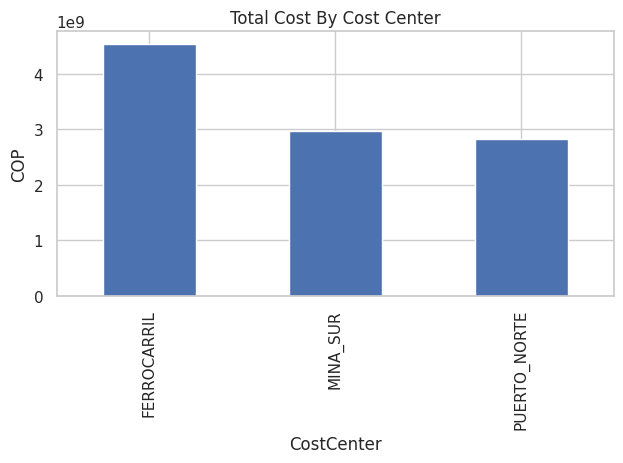

In [29]:
# Visualization - Costs
fi_summary[['OperationCost']].plot(kind='bar', title='Total Cost By Cost Center', legend=False)
plt.ylabel('COP')
plt.tight_layout()
plt.show()

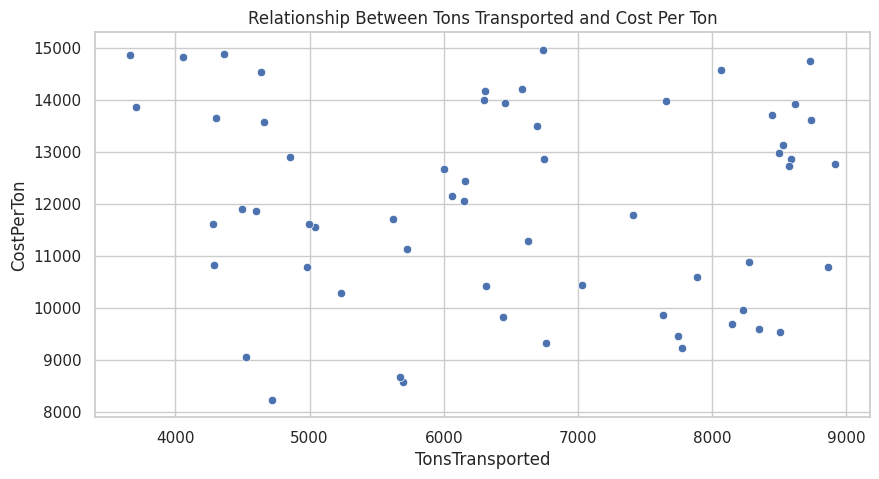

In [30]:
# Transporte: relación costo-tonelada
plt.figure(figsize=(10,5))
sns.scatterplot(data=rail_data, x='TonsTransported', y='CostPerTon')
plt.title('Relationship Between Tons Transported and Cost Per Ton')
plt.show()

In [ ]:
# The scatterplot shows no strong correlation between TonsTransported and CostPerTon.
# This suggests that the cost per ton may be influenced by other operational factors beyond volume, such as fixed costs or route variability.
# Further analysis could include segmenting by transport type or identifying cost drivers.

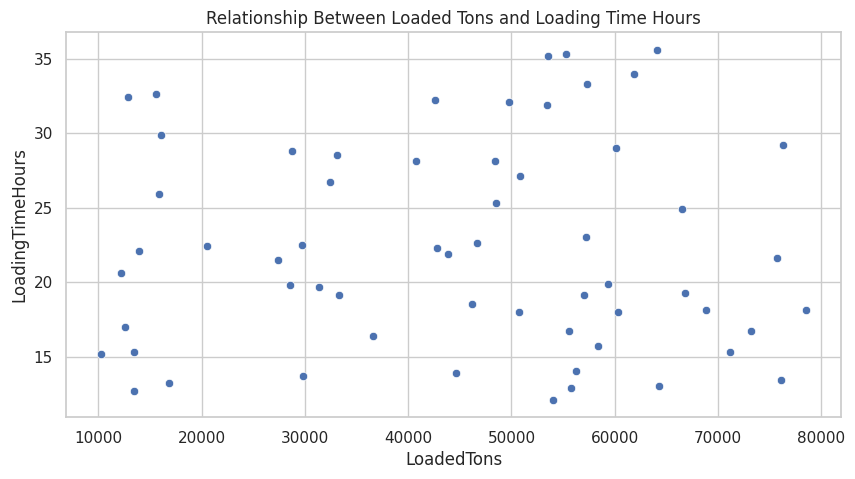

In [34]:
# Time management: relationship Loaded Tons - Loading Time Hours
plt.figure(figsize=(10,5))
sns.scatterplot(data=wms_data, x='LoadedTons', y='LoadingTimeHours')
plt.title('Relationship Between Loaded Tons and Loading Time Hours')
plt.show()

In [ ]:
# While a positive correlation between LoadedTons and LoadingTimeHours is expected, the chart does not clearly reflect it.
# This may indicate variations in operational efficiency, idle times, or differences between vessel types.
# It's recommended to calculate loading efficiency (Tons/Hour) and review outliers to better understand the behavior.

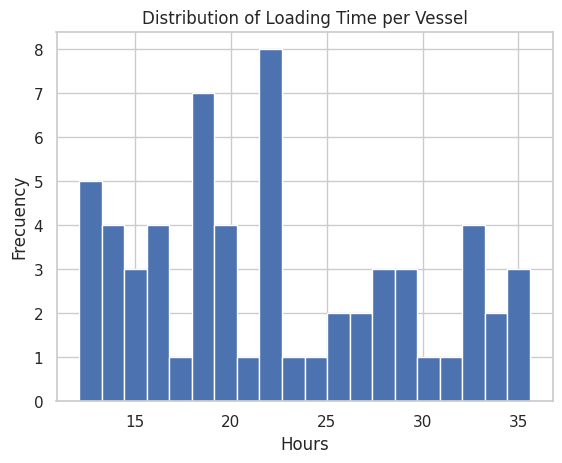

In [33]:
# Port: loading time distribution
wms_data['LoadingTimeHours'].hist(bins=20)
plt.title('Distribution of Loading Time per Vessel')
plt.xlabel('Hours')
plt.ylabel('Frecuency')
plt.show()

In [35]:
# The distribution of loading time per vessel appears irregular, with peaks around 13–14, 20–22, and 30–35 hours.
# This variability may indicate differences in vessel type, equipment availability, or operational inefficiencies.
# Further segmentation by vessel ID or loading shift could help explain the time dispersion.